In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

In [2]:
def create_probability_distribution(center_index, std_dev, size):
    indices = np.arange(size)
    probabilities = np.exp(-((indices - center_index)**2) / (2 * std_dev**2)) / (std_dev * np.sqrt(2 * np.pi))
    probabilities /= np.sum(probabilities)
    return probabilities

def create_plot(d1, d2, show=True):
    fig = plt.figure(figsize=(12,7))
    plt.bar(np.arange(len(d1)) - 0.5, d1, label='distribution 1', width=1, align='edge', edgecolor='black')
    plt.bar(np.arange(len(d2)) - 0.5, d2, label='distribution 2', width=1, align='edge', edgecolor='black', alpha=0.8)
    loss = CategoricalCrossentropy()(d1, d2)
    plt.title('loss: {}'.format(loss))
    plt.legend()
    if show:
        plt.show()
    return fig

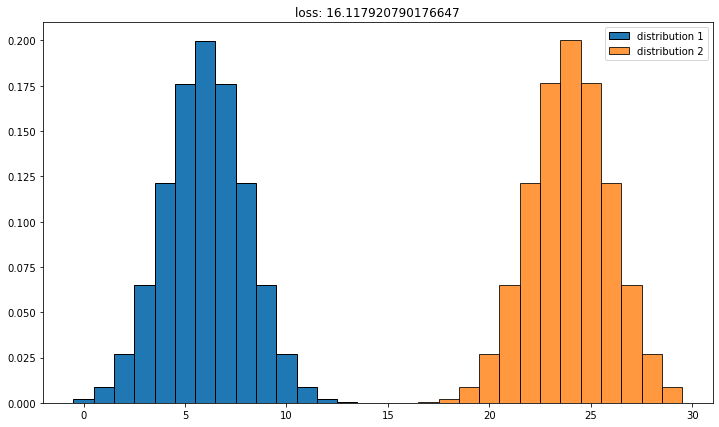

In [3]:
d1 = create_probability_distribution(6, 2, 30)
d2 = create_probability_distribution(24, 2, 30)
f = create_plot(d1, d2)

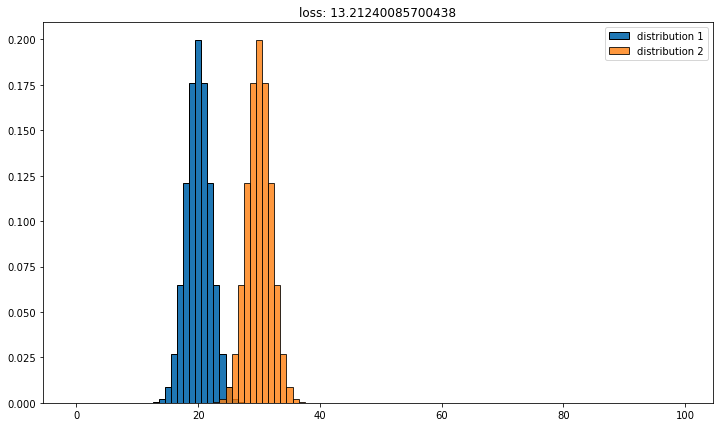

In [4]:
d1 = create_probability_distribution(20, 2, 100)
d2 = create_probability_distribution(30, 2, 100)
f = create_plot(d1, d2)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import tensorflow as tf

def create_probability_distribution(center_index, std_dev, size):
    indices = np.arange(size)
    probabilities = np.exp(-((indices - center_index)**2) / (2 * std_dev**2)) / (std_dev * np.sqrt(2 * np.pi))
    probabilities /= np.sum(probabilities)
    return probabilities

def update_plot(center_index_1, std_dev_1, center_index_2, std_dev_2):
    probability_distribution_1 = create_probability_distribution(center_index_1, std_dev_1, size)
    probability_distribution_2 = create_probability_distribution(center_index_2, std_dev_2, size)
    
    loss = tf.keras.losses.categorical_crossentropy(probability_distribution_1, probability_distribution_2)
    
    plt.figure(figsize=(10, 6))
    plt.bar(np.arange(size) - 0.5, probability_distribution_1, width=1., align='center', label='Distribution 1', edgecolor='black')
    plt.bar(np.arange(size) - 0.5, probability_distribution_2, width=1., align='center', label='Distribution 2', edgecolor='black', alpha=0.8)
    plt.xlabel('Index')
    plt.ylabel('Probability')
    plt.title('Categorical Cross-Entropy: {:.8f}'.format(loss.numpy()))
    plt.legend()
    plt.ylim(0, max(max(probability_distribution_1), max(probability_distribution_2)) + 0.02)
    plt.show()

# Initial parameters
center_index_1 = 5
std_dev_1 = 1.5
center_index_2 = 7
std_dev_2 = 1.0
size = 150

center_index_1_slider = FloatSlider(min=0, max=size-1, step=0.5, value=center_index_1, description='Center 1:')
std_dev_1_slider = FloatSlider(min=0.1, max=10.0, step=0.1, value=std_dev_1, description='Std Dev 1:')
center_index_2_slider = FloatSlider(min=0, max=size-1, step=0.5, value=center_index_2, description='Center 2:')
std_dev_2_slider = FloatSlider(min=0.1, max=10.0, step=0.1, value=std_dev_2, description='Std Dev 2:')

interact(update_plot, center_index_1=center_index_1_slider, std_dev_1=std_dev_1_slider,
         center_index_2=center_index_2_slider, std_dev_2=std_dev_2_slider);


interactive(children=(FloatSlider(value=5.0, description='Center 1:', max=149.0, step=0.5), FloatSlider(value=…